In [144]:
#Import all of our necessary libraries

import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [145]:
def isFloat(s):
    try:
        float(s)
        return True
    except ValueError:
        #print("Value error: ",s)
        return False

with open("Log-batteryusage.csv") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    num_iters = len(data)-1
    num_nodes = len(data[0])-1
    batteryLevels = [x[:] for x in [[0.0] * num_nodes] * num_iters]
    print(num_nodes)

    for i in range(0,num_iters):
        for j in range(1,num_nodes):
            
            if(isFloat(data[i][j])):
                try:
                    batteryLevels[i][j-1] = float(data[i][j])
                except IndexError:
                    print(i,j)

2001


batteryFreq = [[0]*10]*199
for row_num in range(0,199):
    for col in range(0,10):
        ind = int(batteryLevels[row_num ][col]/10)
        batteryFreq[row_num ][ind] += 1

In [146]:
batteryFreq = [[0]*10 for _ in range(200)]
for row_num in range(0,num_iters):
    for col in range(0,num_nodes-1):
        ind = int(batteryLevels[row_num][col+1]/10)
        temp = batteryFreq[row_num][ind] + 1
        batteryFreq[row_num][ind] = temp

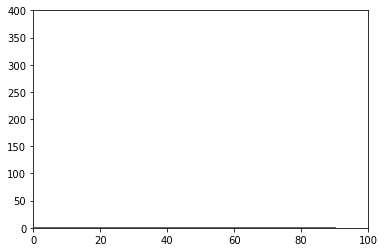

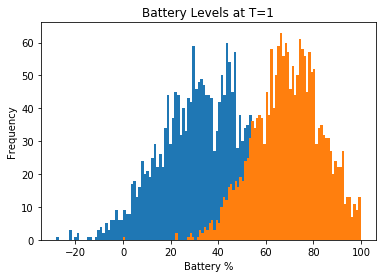

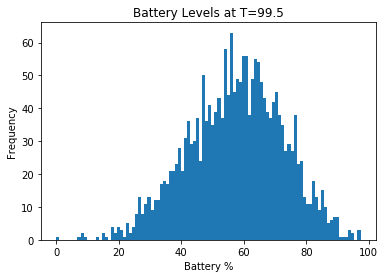

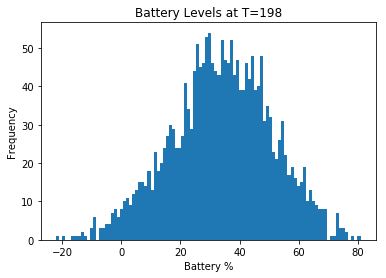

In [147]:
plt.hist(batteryLevels[1][1:], bins=100)
plt.title("Battery Levels at T=1")
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[int(num_iters/2)][1:], bins=100)
middle = str(num_iters/2)
plt.title("Battery Levels at T="+middle)
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[num_iters-1][1:], bins=100)
end = str(num_iters-1)
plt.title("Battery Levels at T="+end)
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

In [148]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0, 400))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [0,10,20,30,40,50,60,70,80,90]
    y = batteryFreq[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=25, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

#to save file:
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

HTML(anim.to_html5_video())

In [149]:
num = 0
def update_hist(num):
    plt.cla()
    plt.hist(batteryLevels[num],bins=100)
    plt.title("Battery Levels at T="+str(num))
    plt.xlabel("Battery %")
    plt.ylabel("Frequency")

fig = plt.figure()
hist = plt.hist(batteryLevels[0])

animation = animation.FuncAnimation(fig, update_hist, num_iters, fargs=(num) )
HTML(animation.to_html5_video())

ValueError: object too deep for desired array

In [162]:
b = [x[:] for x in [[0.0] * num_nodes] * (num_iters-1)]
for i in range(1,num_iters):
    b[i-1] = sorted(batteryLevels[i])

In [163]:
print("Iteration\tMin\tLowerQuartile\tUpperQuartile\t  Max")
for i in range(0,num_iters):
    minimum = b[i][0]
    maximum = b[i][1999]
    lowerq = b[i][499]
    upperq = b[i][1499]
    print("  ",i,"\t","\t",minimum,"\t",lowerq,"\t",upperq,"\t",maximum)

Iteration	Min	LowerQuartile	UpperQuartile	  Max
   0 	 	 0.0 	 60.0994 	 79.0688 	 99.7189
   1 	 	 0.0 	 60.0794 	 79.0488 	 99.6989
   2 	 	 0.0 	 60.0594 	 79.0288 	 99.6789
   3 	 	 0.0 	 60.0394 	 79.0051 	 99.6589
   4 	 	 0.0 	 60.0194 	 78.9851 	 99.6389
   5 	 	 0.0 	 59.9994 	 78.965 	 99.6189
   6 	 	 0.0 	 59.9794 	 78.945 	 99.5988
   7 	 	 0.0 	 59.9594 	 78.925 	 99.5788
   8 	 	 0.0 	 59.9394 	 78.905 	 99.5588
   9 	 	 0.0 	 59.8697 	 78.885 	 99.5388
   10 	 	 0.0 	 59.8461 	 78.865 	 99.5188
   11 	 	 0.0 	 59.8261 	 78.7775 	 99.4988
   12 	 	 0.0 	 59.8061 	 78.6841 	 99.4788
   13 	 	 0.0 	 59.7733 	 78.6641 	 99.4588
   14 	 	 0.0 	 59.7471 	 78.6441 	 99.4388
   15 	 	 0.0 	 59.6415 	 78.5956 	 99.3942
   16 	 	 0.0 	 59.6025 	 78.5756 	 99.2495
   17 	 	 0.0 	 59.5826 	 78.5555 	 99.2295
   18 	 	 0.0 	 59.5626 	 78.5289 	 99.2095
   19 	 	 0.0 	 59.516 	 78.5089 	 99.1895
   20 	 	 0.0 	 59.496 	 78.4716 	 99.1694
   21 	 	 0.0 	 59.476 	 78.4382 	 99.1494
   

IndexError: list index out of range